In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display, Markdown

import pandas as pd
import numpy as np

import json

# Load, prep data

In [9]:
stages_and_vuln_df = pd.read_csv('./data/17-OUTPUT-gpt4-turbo-relationship-stages-and-vulnerability.csv')
stages_and_vuln_df

,performer,song,rationale,relationship_stage,vulnerability_ranking
0,"""Weird Al"" Yankovic",White & Nerdy,"satirizes the stereotypes of nerdy behavior, n...",NaN,NaN
1,'N Sync,(God Must Have Spent) A Little More Time On You,expresses awe and gratitude for a loved one's ...,Consummation,Vulnerable
2,'N Sync,Bye Bye Bye,"firmly ends a one-sided relationship, with the...",End,Invulnerable
3,'N Sync,It's Gonna Be Me,confident that he will be the one to win over ...,Courtship,Invulnerable
4,'N Sync,This I Promise You,a pledge of true and lasting commitment to a p...,Consummation,Invulnerable
...,...,...,...,...,...
4891,Elton John,"Can You Feel The Love Tonight (From ""The Lion ...",a description of the blooming love between two...,Courtship,Vulnerable
4892,Nirvana,Smells Like Teen Spirit!,"a critique of apathy and rebellion, not a roma...",NaN,NaN
4893,Pretty Poison,"Catch Me (I'm Falling) (From The Film ""Hiding ...",expresses being unable to resist falling in love,Courtship,Vulnerable
4894,Prince,"Batdance (From ""Batman"")",an eclectic mix of sound and dialogue from the...,NaN,NaN


In [10]:
gender_df = pd.read_csv('./data/11-OUTPUT-with-gender-from-gpt4.csv')
date_as_decimal = (gender_df.chart_debut_date_normalized_0_to_1 / 100) * (2023 - 1959) + 1959
date_as_decimal
gender_df['date_as_decimal'] = date_as_decimal
gender_df

grouped_by_song_df = gender_df.groupby(['performer', 'song']).first().reset_index()
grouped_by_song_df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count,gender,date_as_decimal
0,"""Weird Al"" Yankovic",White & Nerdy,ROCK,They see me mowin' my front lawn,2006-10-14,50.912490,44.870985,74.845,10.0,0,m,2006.90080
1,'N Sync,(God Must Have Spent) A Little More Time On You,POP,Yeah...,1998-12-05,81.288336,39.382591,62.655,0.0,12,m,1999.09920
2,'N Sync,Bye Bye Bye,POP,"Hey, hey",2000-01-29,71.402847,30.184848,64.441,0.0,14,m,2000.24224
3,'N Sync,It's Gonna Be Me,POP,(It's gonna be me),2000-05-06,68.789522,53.089582,64.860,0.0,0,m,2000.51040
4,'N Sync,This I Promise You,POP,Oh oh oh oh,2000-09-30,74.214520,30.421922,65.481,0.0,14,m,2000.90784
...,...,...,...,...,...,...,...,...,...,...,...,...
5011,matchbox twenty,Unwell,ROCK,All day,2003-03-22,56.149341,35.176103,69.317,10.0,7,m,2003.36288
5012,twenty one pilots,Heathens,ROCK,"All my friends are heathens, take it slow (In ...",2016-07-09,58.202752,54.398868,89.969,10.0,0,m,2016.58016
5013,twenty one pilots,Ride,ROCK,I just wanna stay in the sun where I find,2016-04-02,48.387025,35.286120,89.550,10.0,1,m,2016.31200
5014,twenty one pilots,Stressed Out,ROCK,I wish I found some better sounds no one's eve...,2015-05-16,60.782772,37.133766,88.183,10.0,1,m,2015.43712


In [12]:
df = grouped_by_song_df.merge(stages_and_vuln_df, on=['performer', 'song'], how='inner')


import re
def split_on_featuring(s):
    parts = re.split('(?i)featuring', s)
    if parts:
        return parts[0].strip()
    return s
def split_on_with(s):
    parts = re.split('(?i)with', s)
    if parts:
        return parts[0].strip()
    return s


df['primary_performer'] = df['performer'].apply(split_on_featuring).apply(split_on_with)

df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count,gender,date_as_decimal,rationale,relationship_stage,vulnerability_ranking,primary_performer
0,"""Weird Al"" Yankovic",White & Nerdy,ROCK,They see me mowin' my front lawn,2006-10-14,50.912490,44.870985,74.845,10.0,0,m,2006.90080,"satirizes the stereotypes of nerdy behavior, n...",NaN,NaN,"""Weird Al"" Yankovic"
1,'N Sync,(God Must Have Spent) A Little More Time On You,POP,Yeah...,1998-12-05,81.288336,39.382591,62.655,0.0,12,m,1999.09920,expresses awe and gratitude for a loved one's ...,Consummation,Vulnerable,'N Sync
2,'N Sync,Bye Bye Bye,POP,"Hey, hey",2000-01-29,71.402847,30.184848,64.441,0.0,14,m,2000.24224,"firmly ends a one-sided relationship, with the...",End,Invulnerable,'N Sync
3,'N Sync,It's Gonna Be Me,POP,(It's gonna be me),2000-05-06,68.789522,53.089582,64.860,0.0,0,m,2000.51040,confident that he will be the one to win over ...,Courtship,Invulnerable,'N Sync
4,'N Sync,This I Promise You,POP,Oh oh oh oh,2000-09-30,74.214520,30.421922,65.481,0.0,14,m,2000.90784,a pledge of true and lasting commitment to a p...,Consummation,Invulnerable,'N Sync
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,matchbox twenty,Unwell,ROCK,All day,2003-03-22,56.149341,35.176103,69.317,10.0,7,m,2003.36288,"describes feeling unwell and misunderstood, ap...",Struggle,Vulnerable,matchbox twenty
4862,twenty one pilots,Heathens,ROCK,"All my friends are heathens, take it slow (In ...",2016-07-09,58.202752,54.398868,89.969,10.0,0,m,2016.58016,references forming connections among the disaf...,NaN,NaN,twenty one pilots
4863,twenty one pilots,Ride,ROCK,I just wanna stay in the sun where I find,2016-04-02,48.387025,35.286120,89.550,10.0,1,m,2016.31200,reflects on life’s journey and one’s personal ...,NaN,NaN,twenty one pilots
4864,twenty one pilots,Stressed Out,ROCK,I wish I found some better sounds no one's eve...,2015-05-16,60.782772,37.133766,88.183,10.0,1,m,2015.43712,touches on the stress of adult life and longin...,NaN,NaN,twenty one pilots


# Anaylsize!

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
RELATIONSHIP_STAGES = [
    'Pre-Courtship', 'Courtship', 'Struggle', 'Consummation', 'End', 'Thwarted'
]

VULNERABILITY_RANKINGS = [
    'Vulnerable', 'Invulnerable', 'Mixed or unclear'
]

COLOR_MAP = {
    'none': 'gray',
    'Consummation': 'pink',
    'End': 'blue',
    'Courtship': 'red',
    'Struggle': 'brown',
    'Thwarted': 'purple',
    'Pre-Courtship': 'green',
    'Vulnerable': 'orange',
    'Invulnerable': 'yellow',
    'Mixed or unclear': 'gray'
}

def stacked_bars_over_time(df, stages_to_include=RELATIONSHIP_STAGES, vulnerability_types_to_include=VULNERABILITY_RANKINGS, title_prepend='', show_non_love_songs=False):
    # Create a copy of the DataFrame to avoid modifying the original one
    df_copy = df.copy()

    # If show_non_love_songs is True, replace np.nan in relationship_stage or vulnerability_ranking with 'non love songs'
    if show_non_love_songs:
        df_copy.loc[df_copy['relationship_stage'].isna() | df_copy['vulnerability_ranking'].isna(), 'relationship_stage'] = 'non love songs'
        stages_to_include = stages_to_include + ['non love songs']
        COLOR_MAP['non love songs'] = 'gray'

    # Filter the DataFrame to include only the specified stages
    filtered_df = df_copy[df_copy['relationship_stage'].isin(stages_to_include)]

    # Group by stage and then calculate the count for each 0.25 interval in date_as_decimal
    grouped_df = filtered_df.groupby(['relationship_stage', (filtered_df['date_as_decimal']*4).astype(int)/4]).size().reset_index(name='count')
    grouped_df.rename(columns={'date_as_decimal': 'quarterly_decimal'}, inplace=True)

    # Pivot the DataFrame so that relationship_stage becomes the columns, the date is the index, and the values are the counts
    pivoted_df = grouped_df.pivot(index='quarterly_decimal', columns='relationship_stage', values='count').fillna(0)

    # Calculate the total number of songs for each quarterly interval
    quarterly_totals = pivoted_df.sum(axis=1)

    # Divide by the quarterly totals to get the percentages
    pivoted_df = pivoted_df.divide(quarterly_totals, axis=0) * 100

    # Apply a rolling mean with a window of size
    pivoted_df = pivoted_df.rolling(window=16).mean().dropna()

    # Order the columns based on the RELATIONSHIP_STAGES array
    pivoted_df = pivoted_df[stages_to_include]

    # Define the colors for the areas based on the sorted columns
    colors = [COLOR_MAP[stage] for stage in stages_to_include]

    # Create a stacked area plot with the specified colors
    plt.figure(figsize=(15, 8))
    stack_coll = plt.stackplot(pivoted_df.index, pivoted_df.T, colors=colors, alpha=0.5)

    # Label the areas directly on the plot, centered within each area
    for i, stage in enumerate(stages_to_include):
        y_offset = pivoted_df.iloc[:, :i].sum(axis=1).rolling(window=2).mean().dropna().values
        y_values = pivoted_df[stage].rolling(window=2).mean().dropna().values
        y_mid = y_offset + y_values / 2
        x_values = pivoted_df.index
        plt.text(x_values[len(x_values)//2], y_mid[len(y_mid)//2], stage, ha='center', va='center')

    plt.title(f'{title_prepend} Relationship Stages Over Time (percentage of total, rolling average)')
    plt.xlabel('Year')
    plt.xlim(1958, 2022)
    plt.ylim(0, 100)  # Set y-axis limits to 0-100
    plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')  # Add faint gray horizontal grid lines
    plt.yticks(range(0, 101, 10))  
    plt.ylabel('Percentage of Total Songs')
    plt.show()

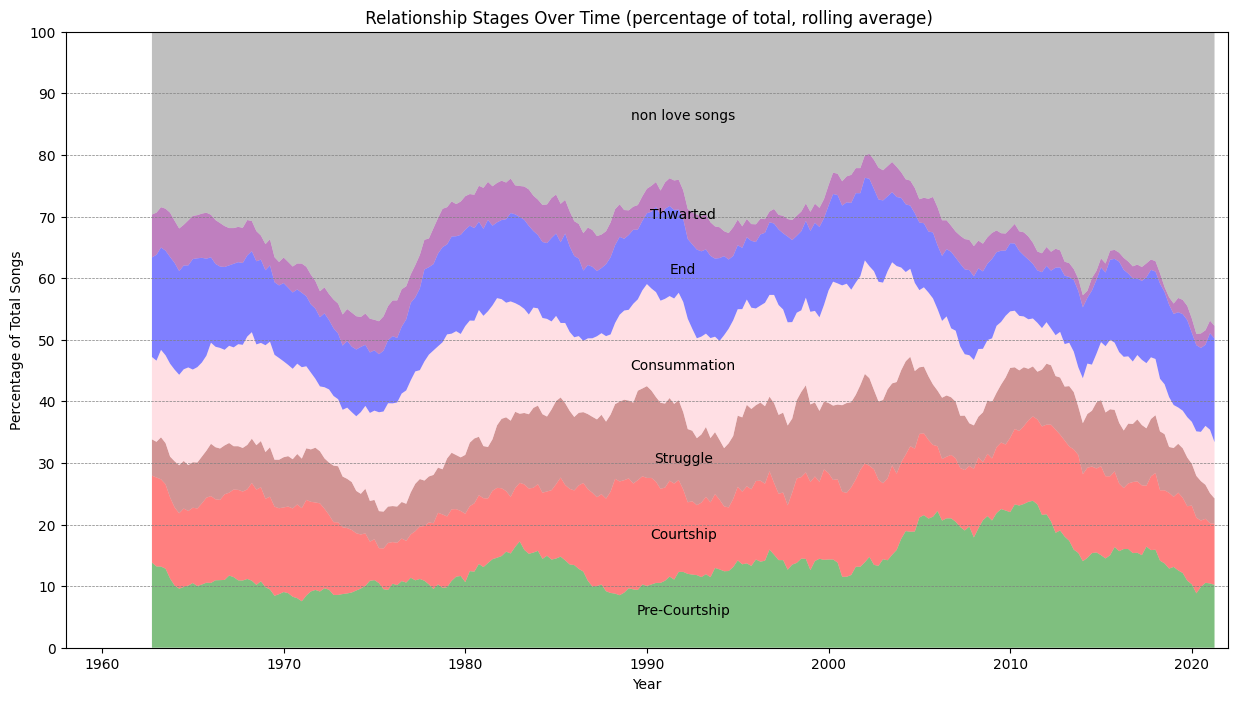

In [47]:
stacked_bars_over_time(df, show_non_love_songs=True)

# Splitting on vulnarilbity ranking

In [65]:
COLOR_MAP = {
    'none': (0.5, 0.5, 0.5),  # gray
    'Consummation': (1, 0.75, 0.8),  # pink
    'End': (0, 0, 1),  # blue
    'Courtship': (1, 0, 0),  # red
    'Struggle': (0.6, 0.3, 0),  # brown
    'Thwarted': (0.5, 0, 0.5),  # purple
    'Pre-Courtship': (0, 0.5, 0),  # green
    'Vulnerable': (1, 0.5, 0),  # orange
    'Invulnerable': (1, 1, 0),  # yellow
    'Mixed or unclear': (0.5, 0.5, 0.5)  # gray
}

def stacked_bars_over_time_split_by_vulnerability_ranking(df, stages_to_include=RELATIONSHIP_STAGES, vulnerability_types_to_include=['Vulnerable', 'Invulnerable'], title_prepend='', show_non_love_songs=False):
    df_copy = df.copy()

    if show_non_love_songs:
        df_copy.loc[df_copy['relationship_stage'].isna() | df_copy['vulnerability_ranking'].isna(), 'relationship_stage'] = 'non love songs'
        stages_to_include = stages_to_include + ['non love songs']
        COLOR_MAP['non love songs'] = (0.5, 0.5, 0.5)  # gray

    filtered_df = df_copy[df_copy['relationship_stage'].isin(stages_to_include) & df_copy['vulnerability_ranking'].isin(vulnerability_types_to_include)]

    grouped_df = filtered_df.groupby(['relationship_stage', 'vulnerability_ranking', (filtered_df['date_as_decimal']*4).astype(int)/4]).size().reset_index(name='count')
    grouped_df.rename(columns={'date_as_decimal': 'quarterly_decimal'}, inplace=True)

    pivoted_df = grouped_df.pivot(index='quarterly_decimal', columns=['relationship_stage', 'vulnerability_ranking'], values='count').fillna(0)

    quarterly_totals = pivoted_df.sum(axis=1)

    pivoted_df = pivoted_df.divide(quarterly_totals, axis=0) * 100

    pivoted_df = pivoted_df.rolling(window=16).mean().dropna()

    pivoted_df = pivoted_df[[(stage, ranking) for stage in stages_to_include for ranking in vulnerability_types_to_include]]

    # Define the colors for the areas based on the sorted columns, with 80% transparency for 'Invulnerable'
    TRANSPARENCY = 0.60
    colors = [COLOR_MAP[stage] if ranking == 'Vulnerable' else (COLOR_MAP[stage][0], COLOR_MAP[stage][1], COLOR_MAP[stage][2], TRANSPARENCY) for stage in stages_to_include for ranking in vulnerability_types_to_include]

    plt.figure(figsize=(15, 8))
    stack_coll = plt.stackplot(pivoted_df.index, pivoted_df.T, colors=colors)  # Removed alpha=0.5

    for i, (stage, ranking) in enumerate([(stage, ranking) for stage in stages_to_include for ranking in vulnerability_types_to_include]):
        y_offset = pivoted_df.iloc[:, :i].sum(axis=1).rolling(window=2).mean().dropna().values
        y_values = pivoted_df[(stage, ranking)].rolling(window=2).mean().dropna().values
        y_mid = y_offset + y_values / 2
        x_values = pivoted_df.index
        plt.text(x_values[len(x_values)//2], y_mid[len(y_mid)//2], f'{stage} ({ranking})', ha='center', va='center')

    plt.title(f'{title_prepend} Relationship Stages Over Time (percentage of total, rolling average)')
    plt.xlabel('Year')
    plt.xlim(1958, 2022)
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
    plt.yticks(range(0, 101, 10))
    plt.ylabel('Percentage of Total Songs')
    plt.show()

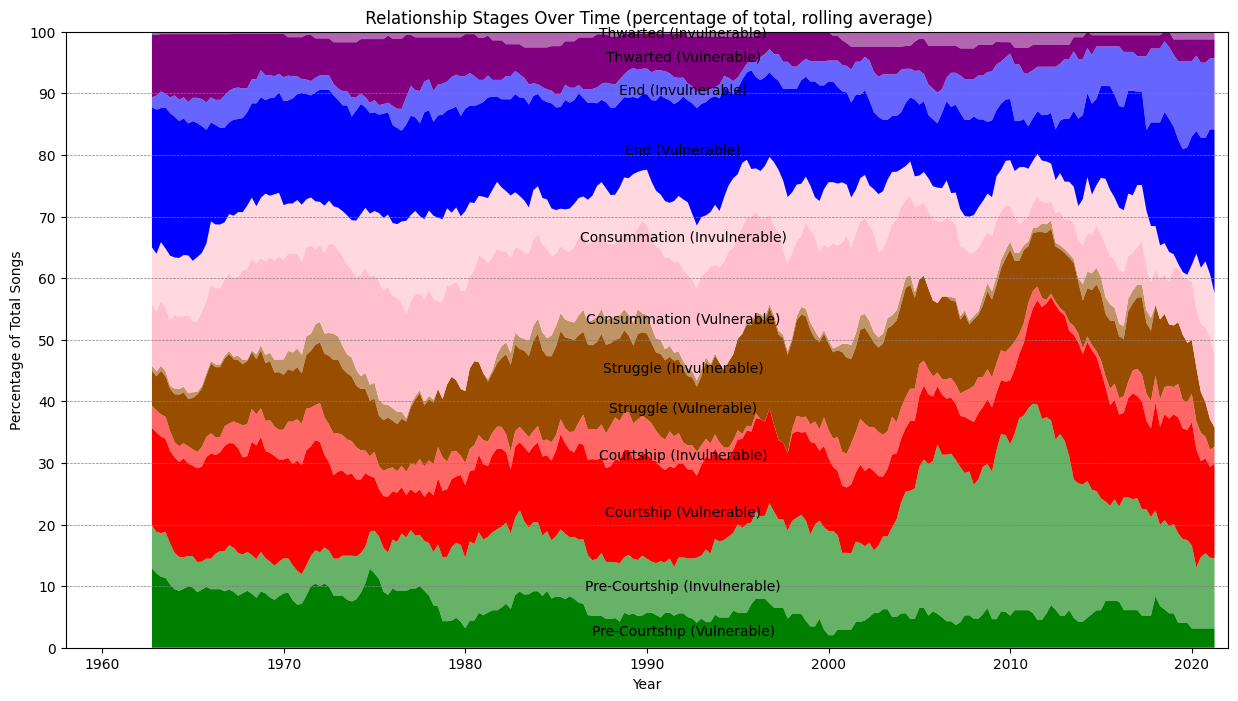

In [66]:
stacked_bars_over_time_split_by_vulnerability_ranking(df)

In [69]:

def stacked_bars_over_time_split_by_vulnerability_ranking(df, stages_to_include=RELATIONSHIP_STAGES, vulnerability_types_to_include=['Vulnerable', 'Invulnerable'], title_prepend='', show_non_love_songs=False):
    df_copy = df.copy()

    if show_non_love_songs:
        df_copy.loc[df_copy['relationship_stage'].isna() | df_copy['vulnerability_ranking'].isna(), 'relationship_stage'] = 'non love songs'
        stages_to_include = stages_to_include + ['non love songs']
        COLOR_MAP['non love songs'] = (0.5, 0.5, 0.5)  # gray

    filtered_df = df_copy[df_copy['relationship_stage'].isin(stages_to_include) & df_copy['vulnerability_ranking'].isin(vulnerability_types_to_include)]

    grouped_df = filtered_df.groupby(['vulnerability_ranking', 'relationship_stage', (filtered_df['date_as_decimal']*4).astype(int)/4]).size().reset_index(name='count')
    grouped_df.rename(columns={'date_as_decimal': 'quarterly_decimal'}, inplace=True)

    pivoted_df = grouped_df.pivot(index='quarterly_decimal', columns=['vulnerability_ranking', 'relationship_stage'], values='count').fillna(0)

    quarterly_totals = pivoted_df.sum(axis=1)

    pivoted_df = pivoted_df.divide(quarterly_totals, axis=0) * 100

    pivoted_df = pivoted_df.rolling(window=16).mean().dropna()

    pivoted_df = pivoted_df[[(ranking, stage) for ranking in vulnerability_types_to_include for stage in stages_to_include]]

    # Define the colors for the areas based on the sorted columns, with transparency for 'Invulnerable'
    TRANSPARENCY = 0.20
    colors = [COLOR_MAP[stage] if ranking == 'Vulnerable' else (COLOR_MAP[stage][0], COLOR_MAP[stage][1], COLOR_MAP[stage][2], TRANSPARENCY) for ranking in vulnerability_types_to_include for stage in stages_to_include]

    plt.figure(figsize=(15, 8))
    stack_coll = plt.stackplot(pivoted_df.index, pivoted_df.T, colors=colors)  # Removed alpha=0.5

    for i, (ranking, stage) in enumerate([(ranking, stage) for ranking in vulnerability_types_to_include for stage in stages_to_include]):
        y_offset = pivoted_df.iloc[:, :i].sum(axis=1).rolling(window=2).mean().dropna().values
        y_values = pivoted_df[(ranking, stage)].rolling(window=2).mean().dropna().values
        y_mid = y_offset + y_values / 2
        x_values = pivoted_df.index
        plt.text(x_values[len(x_values)//2], y_mid[len(y_mid)//2], f'{ranking} ({stage})', ha='center', va='center')

    plt.title(f'{title_prepend} Vulnerability Ranking Over Time (percentage of total, rolling average)')
    plt.xlabel('Year')
    plt.xlim(1958, 2022)
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
    plt.yticks(range(0, 101, 10))
    plt.ylabel('Percentage of Total Songs')
    plt.show()

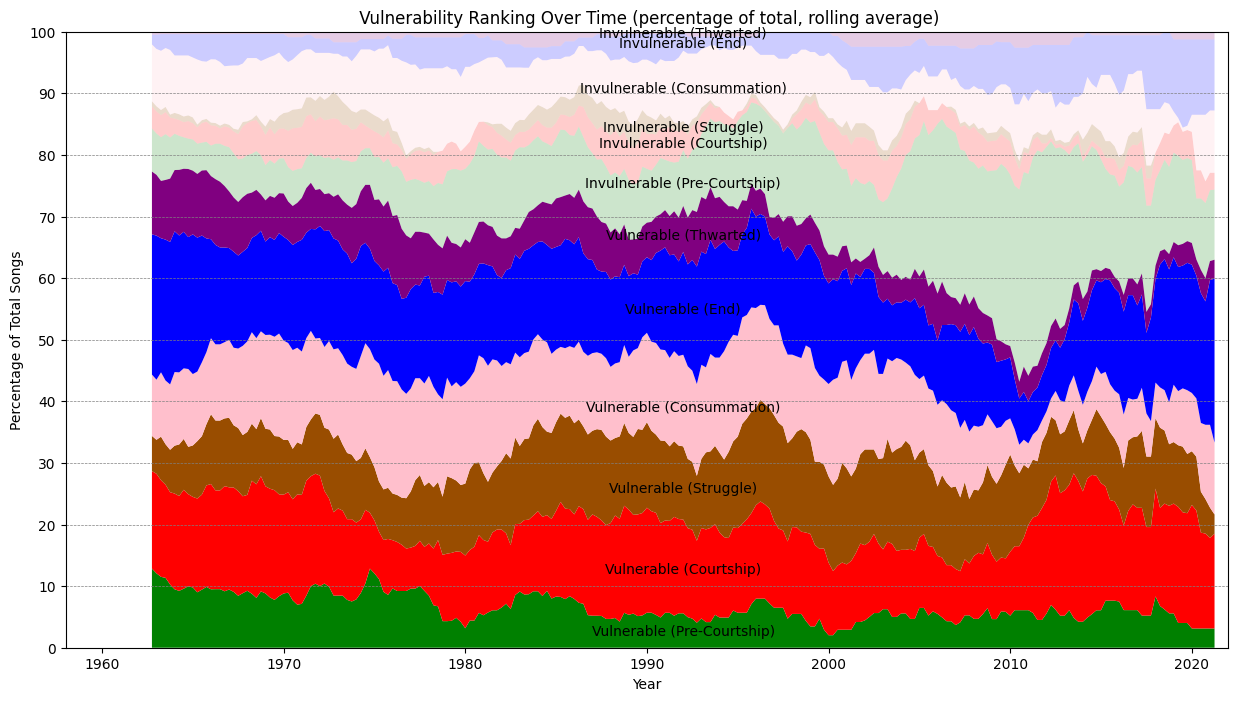

In [70]:
stacked_bars_over_time_split_by_vulnerability_ranking(df)